# Importing modules

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

# Search Dataset from Kaggle

In [3]:
!kaggle datasets list -s 'sms-spam-collection-dataset'

ref                                                       title                                       size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  -----------------------------------------  -----  -------------------  -------------  ---------  ---------------  
uciml/sms-spam-collection-dataset                         SMS Spam Collection Dataset                211KB  2016-12-02 19:29:17         152395       1262  0.7352941        
thedevastator/sms-spam-collection-a-more-diverse-dataset  SMS Spam Collection (Text Classification)  207KB  2022-11-21 16:39:19            848         19  1.0              
arunasivapragasam/spam-or-ham                             Spam (or) Ham                              417KB  2023-02-21 12:21:08            479         17  0.7058824        
muhammadahmedansari/ham-spam-messages-dataset             Ham & Spam Messages Dataset                209KB  2022-12-29 17:36:44        

# Download the dataset

In [4]:
!kaggle datasets download -d "uciml/sms-spam-collection-dataset"

sms-spam-collection-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


# Unzipping the dataset

In [5]:
import zipfile

In [6]:
with zipfile.ZipFile("sms-spam-collection-dataset.zip","r") as file:
    file.extractall("spam")

In [7]:
import os

In [8]:
os.listdir("spam")

['spam.csv']

# Read the dataset

In [9]:
messages=pd.read_csv("spam.csv",sep='\t',names=["label","message"])

In [10]:
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
##cleaning the text
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [12]:
wordnet=WordNetLemmatizer()
corpus=[]
for i in range(len(messages)):
    review=re.sub('[^a-zA-z]',' ',messages['message'][i])
    review=review.lower()
    review=review.split()
    review=[wordnet.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

In [13]:
##creating bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000)
X=cv.fit_transform(corpus).toarray()

In [14]:
##label encoding taget
messages['label'].replace({'ham':0,'spam':1},inplace=True)

In [15]:
messages

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [16]:
y=messages['label']

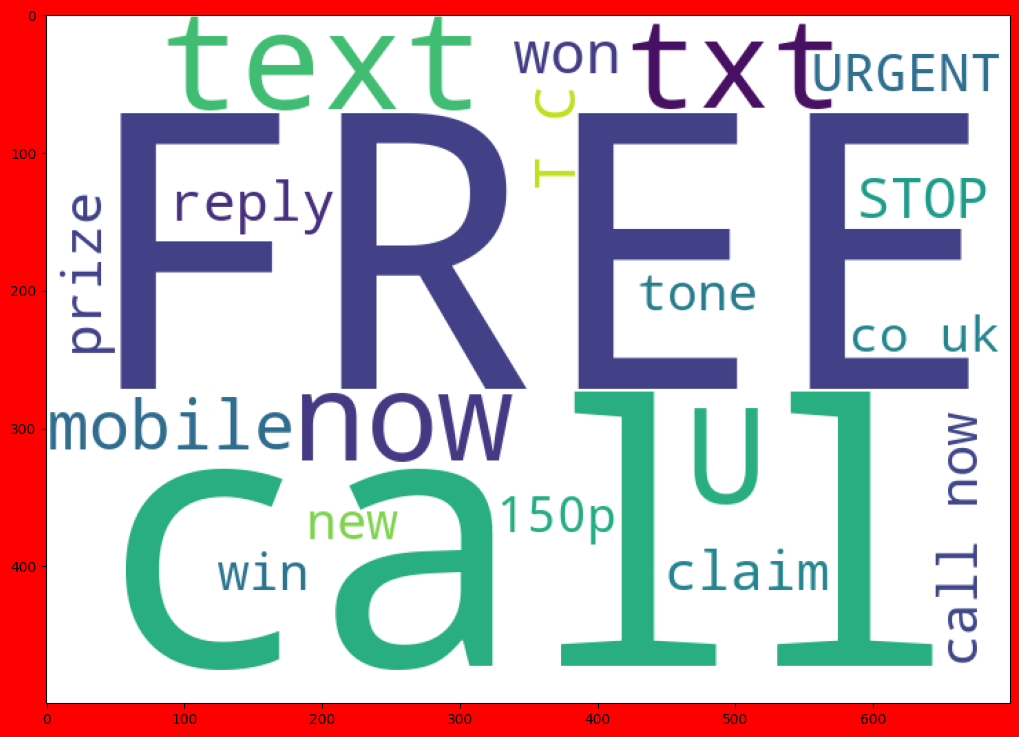

In [17]:
##getting sense of loud words in spam
from wordcloud import WordCloud
spam=messages['message'][messages['label']==1]
spam_cloud=WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spam))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.tight_layout(pad=0)
plt.show()

In [18]:
##train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [19]:
##Training using Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
spam_detect_model=MultinomialNB().fit(X_train,y_train)

In [20]:
y_pred=spam_detect_model.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion=confusion_matrix(y_test,y_pred)

In [22]:
confusion

array([[945,  10],
       [  8, 152]], dtype=int64)

In [23]:
accuracy=accuracy_score(y_test,y_pred)

In [24]:
accuracy

0.9838565022421525